# Quick demo of the wave propagation code `WavePy`

A small notebook to demonstrate a few features. This will create a P-wave sensitivity kernel.

In [1]:
import numpy as np                    # maths toolbox
import matplotlib.pyplot as plt       # plotting toolbox

from WavePyClasses import Grid, Model, HomogeneousModel, Source, Receiver#, plot_kernels


## Set up model

In [2]:
# Setting up the model domain:

Lx = 100e3 # horizontal length of the model in metres
Lz = 60e3 # vertical depth of the model in metres

dx = 400.  # horizontal grid spacing [m]
dz = 400.  # vertical grid spacing [m]

grid = Grid(Lx, Lz, dx, dz)

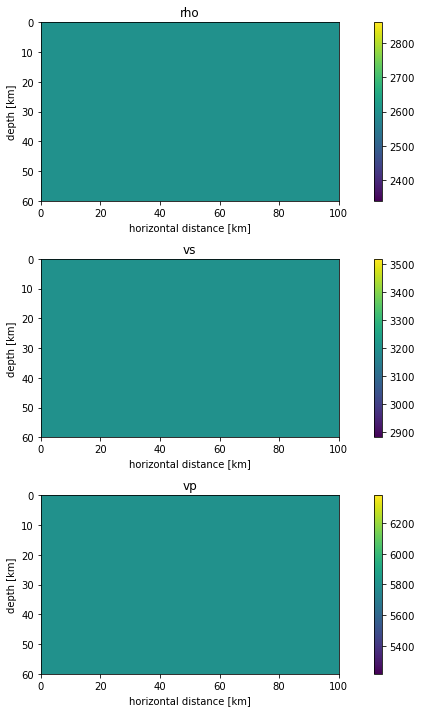

In [3]:
# make model

rho = 2600 # density in kg/m^3
vp  = 5800 # P velocity in m/s
vs  = 3200 # S velocity in m/s

# make a model out of the supplied values
model = HomogeneousModel(grid, rho=rho, vp=vp, vs=vs)

model.plot_model()

## Set up source and receiver

In [4]:
# make source/rec

src = Source(loc_x=40e3, loc_z=30e3) 
rec = Receiver(loc_x=60e3, loc_z=30e3)

# set src timing

src.set_time(t_max=8., dt=0.03)

src.set_stf(
    src_type='ricker',
    src_direction = (1,0),
    t_0 = 2.5,
    tau = 4,
)

print(src)
print(rec)

Source properties:
 location (x,z): 40000.00, 30000.00 m 
 time: from 0.00 to 7.98 s (dt=0.03 s, 267 timesteps)
 source-time-function has been defined

Receiver properties:
 location (x,z): 60000.00, 30000.00 m 



## Run wave propagation

In [5]:
import WaveProp as waveprop

In [6]:
# put all the absorbing boundary info into a Python dictionary

absorbing_boundaries = {
    'left': 25e3,
    'right': 25e3,
    'bottom': 25e3 
    }

In [7]:
%matplotlib notebook
# run the wave propagation
receivers, fw_fields = waveprop.run_waveprop(
    src, rec, model, absorbing_boundaries, 
    plot_wavefield=True, plot_wavefield_every=40,
    store_forward_fields=True,
    verbose=True)

Simulation mode: forward
Lx, Lz   = 100000.0, 60000.0
dx, dz    = 400.0, 400.0 m
nx, nz    = 251, 151
timestep  = 0.03 s
duration  = 8.0 s
timesteps = 267 (running from 0 to 266)
storing wavefield every 10 timesteps  (t = 0.00, 0.30, ... 7.98 s)
plotting the wavefield


<IPython.core.display.Javascript object>

final timestep is 7.9799999999999995 (number 266)


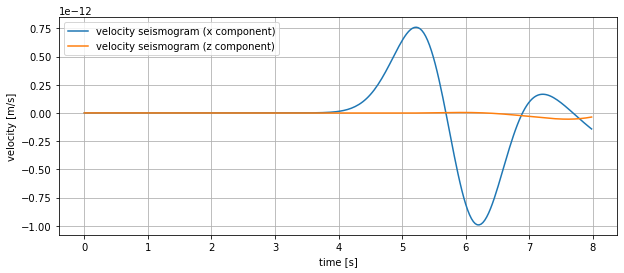

In [8]:
%matplotlib inline
receivers[0].plot_seismogram()

## Pick measurement window and create adjoint source

window goes from 3.5 to 7.5 s


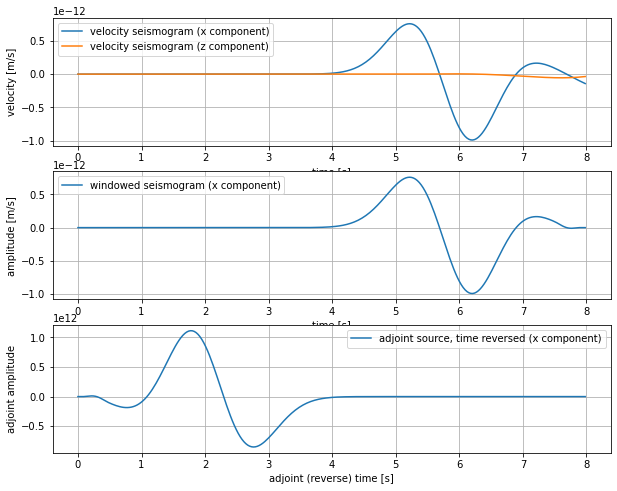

In [9]:
# define the window pick

component_of_window_selection = ['x']
# Fill in these values
window_start = 3.5
window_end   = 7.5

pick = {}
pick['component'] = component_of_window_selection
pick['times'] = [window_start, window_end]
print('window goes from {} to {} s'.format(pick['times'][0], pick['times'][1]))

receivers_Pwave = waveprop.make_adjoint_source(receivers, pick, plot=3)

## Compute sensitivity kernels

In [10]:
%matplotlib notebook
kernels_Pwave = waveprop.run_waveprop(
    src, receivers_Pwave, model, absorbing_boundaries,
    simulation_mode='adjoint', forward_fields= fw_fields, 
    plot_wavefield=True, plot_wavefield_every = 40, 
    verbose = True)

Simulation mode: adjoint
Lx, Lz   = 100000.0, 60000.0
dx, dz    = 400.0, 400.0 m
nx, nz    = 251, 151
timestep  = 0.03 s
duration  = 8.0 s
timesteps = 267 (running from 0 to 266)
retrieving wavefield every 10 timesteps  (t = 7.98, 7.68, ... 0.00 s)
plotting the wavefield


<IPython.core.display.Javascript object>

final timestep is 7.9799999999999995 (number 266)


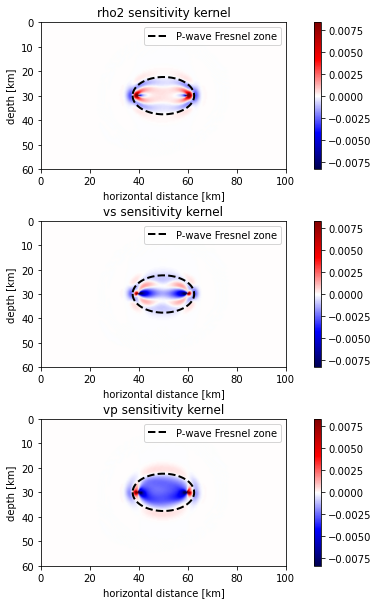

In [11]:
%matplotlib inline
kernels_Pwave.plot_kernels(
    mode='relative',
    model=model, 
    source=src, receiver=receivers_Pwave[0], 
    plot_Fresnel_zone=True,
)